# Task
Analyze the "housing_pd_final" dataset to predict final income using various algorithms (Linear Regression, K-Nearest Neighbors, Random Forest, Gradient Boosting, and Neural Networks). Evaluate the performance of each algorithm using RMSE and identify the best-performing model. Are their key factors that influence the variation in median house values across different regions in the dataset?


In [1]:
import pandas as pd

housing_pd = pd.read_csv('housing.csv')
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
housing_pd['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [3]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled # only data which has non numeric values is ocean_proximity

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [4]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head() #converst it into 0 1 values of coloumn

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [5]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [6]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [7]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_rooms',
                                     'total_bedrooms',	'population',
                                     'households',	'median_income',
                                     '<1H OCEAN',
                                     'INLAND',	'ISLAND',
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [8]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

What are the key factors that influence the variation in median house values across different regions in the dataset?

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

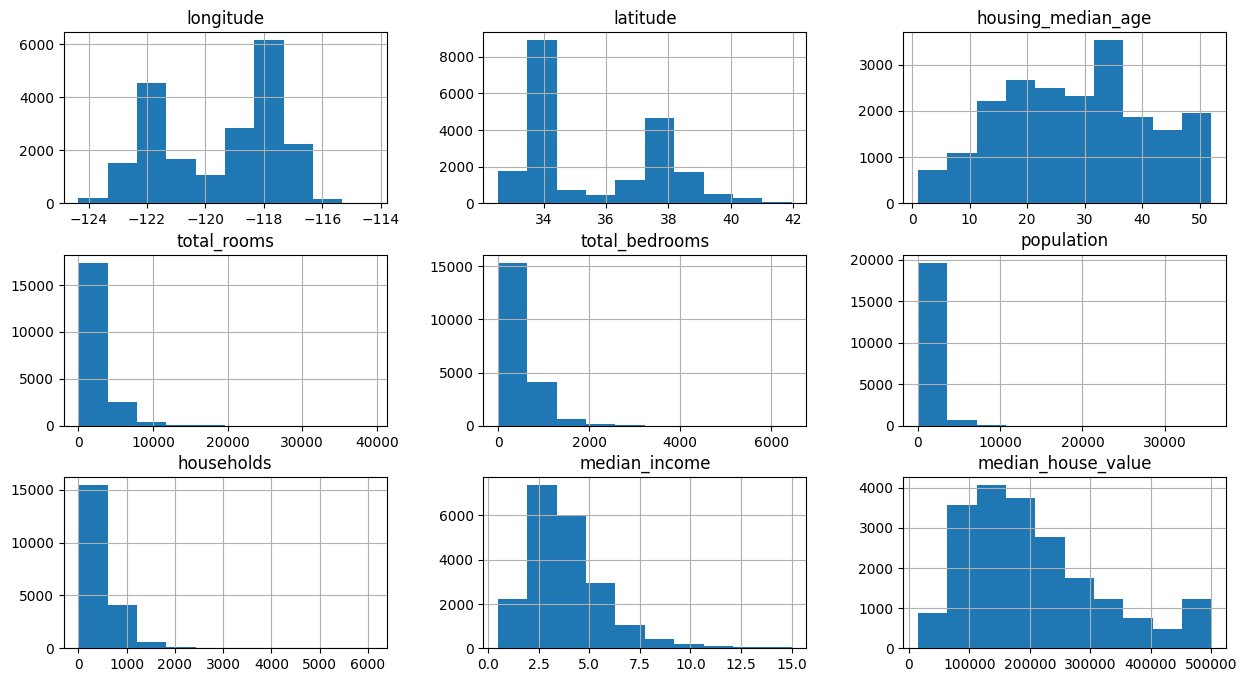

In [9]:
import matplotlib.pyplot as plt
housing_pd_final.hist(figsize=(15,8))

In [10]:
housing_pd_final.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,0.320831,-0.055337,0.009501,-0.474714,0.046185,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.446928,0.351084,-0.016662,0.358785,-0.161342,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.045553,-0.236968,0.017105,0.256149,0.020797,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,-0.003777,0.026477,-0.007603,-0.023647,-0.008674,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,0.073450,-0.019602,-0.010451,-0.061480,-0.023498,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.041883,-0.038265,-0.009119,-0.011280,0.002106,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.168715,-0.237536,-0.009281,0.056677,0.027351,0.688355
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,1.000000,-0.607778,-0.013928,-0.314721,-0.342018,0.257614
INLAND,-0.055337,0.351084,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,-0.607778,1.000000,-0.010681,-0.241356,-0.262289,-0.484787


<Axes: >

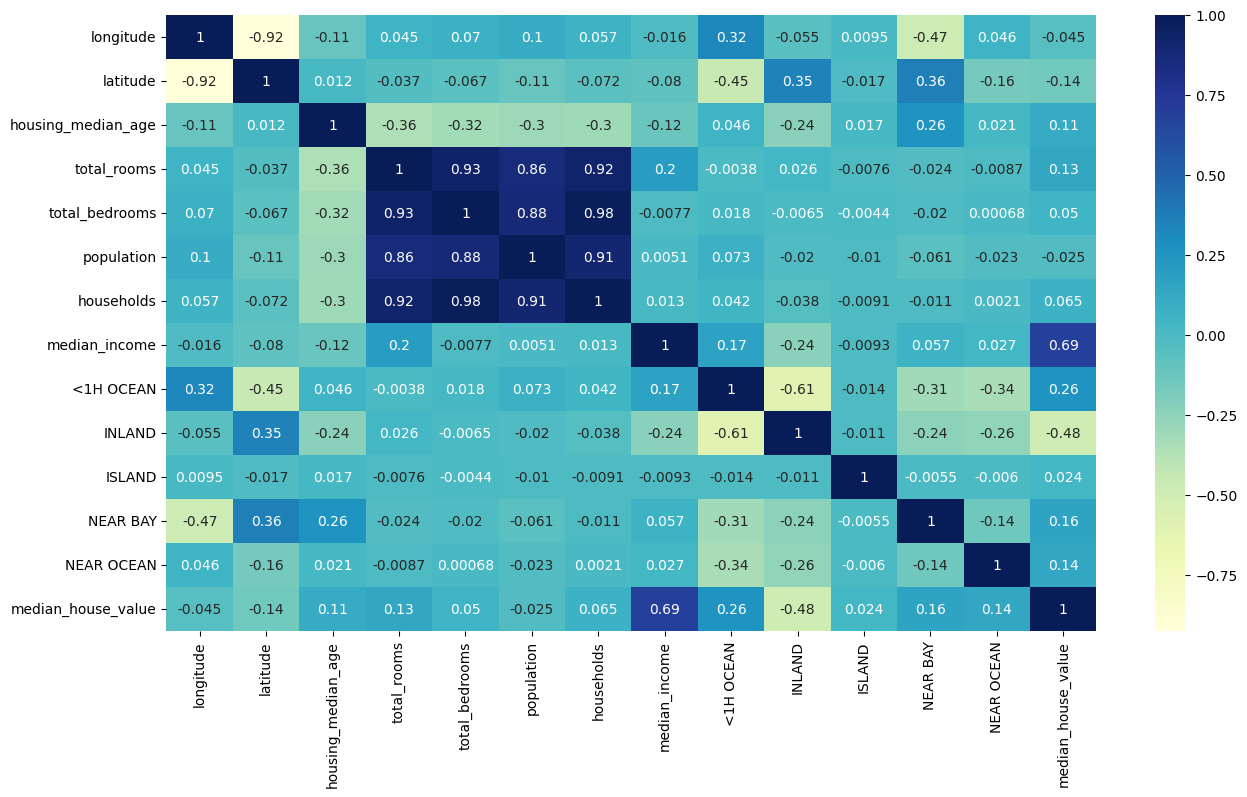

In [11]:
#Visualize corelation with new train_data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(housing_pd_final.corr(numeric_only=True), annot=True, cmap="YlGnBu")

#Result

1.median_income corelates good with median_house_value

2.population, households, total_rooms, total_bedrooms also corelates with each other

3."median_house_value" correlates with the "ocean_proximity" sections.

4.As you move away from NEAR OCEAN to INLAND the value of house value decreases

<Axes: xlabel='latitude', ylabel='longitude'>

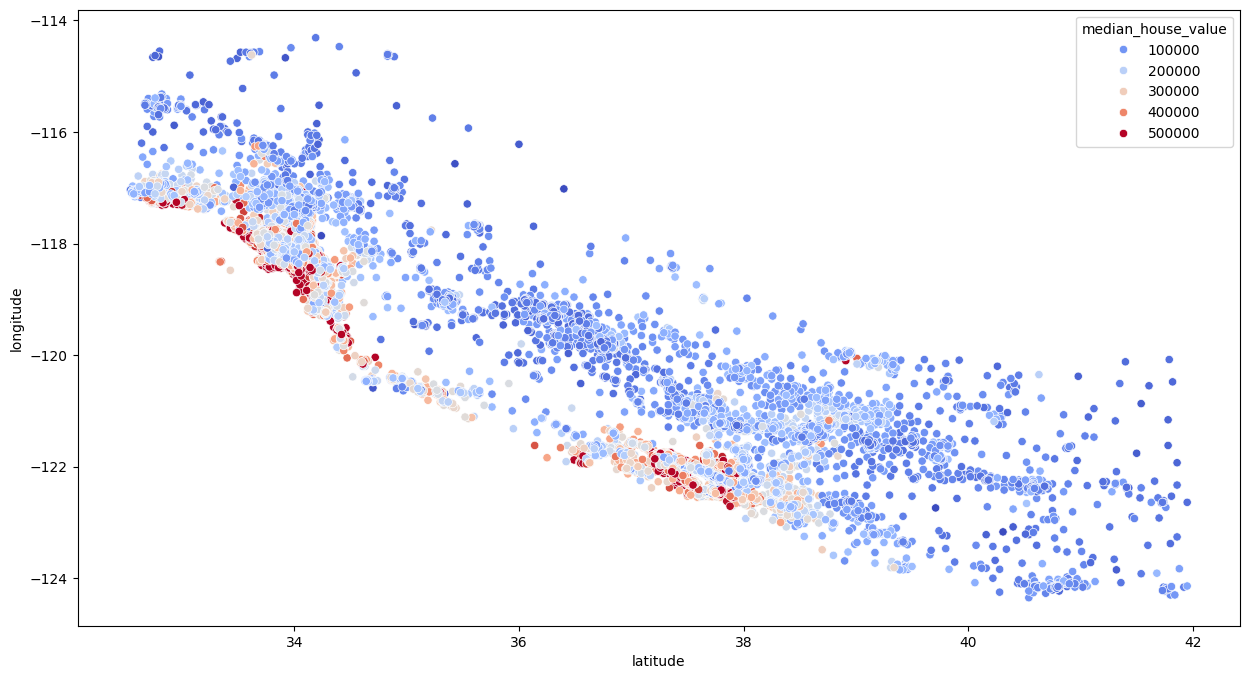

In [12]:
#Checking the corelation between Latitude, Longitude and Median house value

plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=housing_pd_final, hue="median_house_value", palette="coolwarm")

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north

#Results
1. We can see the dots with red shades representing the higher house value are near the coastal areas which is proving
our previous analysis

In [13]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [14]:
# [:, :-1] → all rows, drop last column.
# [:-1, :] → all columns, drop last row.

# [:, -1] → all rows, last column only.
# [-1, :] → last row only, all columns.

X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [15]:
housing_pd_final.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Analyze the "housing_pd_final" dataset to predict final income using various algorithms (Linear Regression, K-Nearest Neighbors, Random Forest, Gradient Boosting, and Neural Networks). Evaluate the performance of each algorithm using RMSE and identify the best-performing model.

In [16]:
from sklearn.preprocessing import StandardScaler#Age (20–80) vs Income (30,000–120,000)Models may think income is more important just because the numbers are bigger,
import numpy as np# One column has mean ~4, another has mean ~50,000 →  scaling helps.

scaler = StandardScaler().fit(X_train[:, :8]) # we do not want to change <1H ocean, inland coloumnc so only till coloumn 8 changes should be done

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)


In [17]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

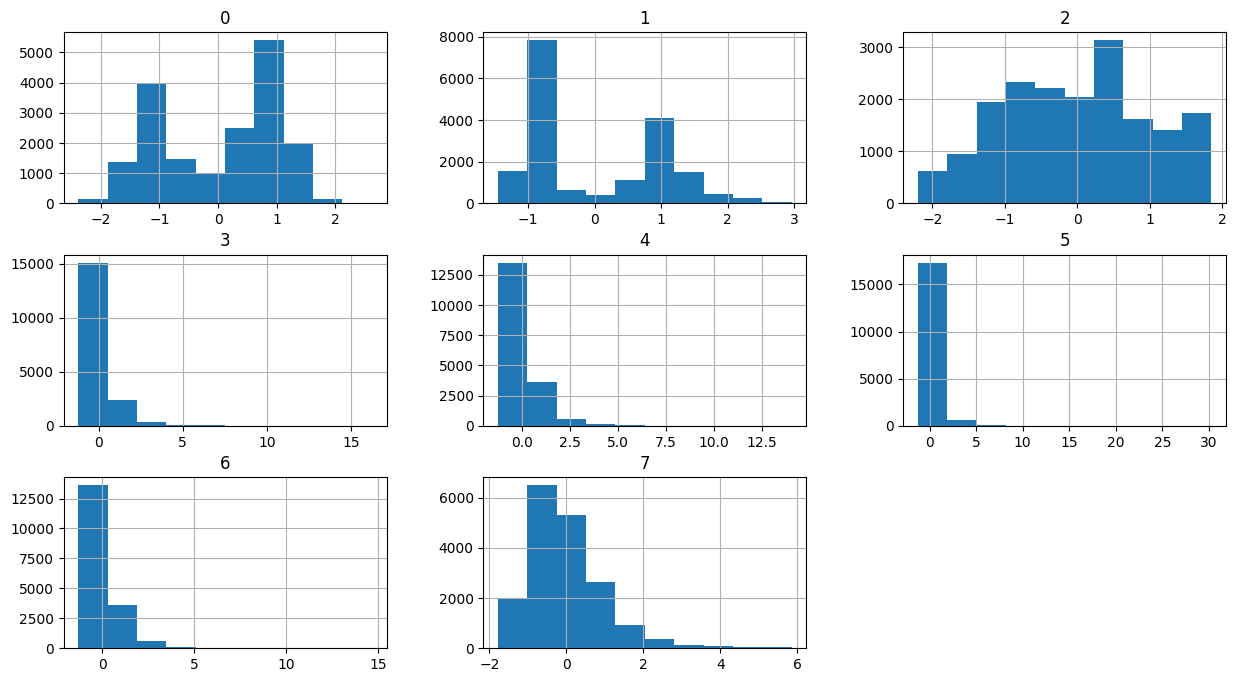

In [18]:
df = pd.DataFrame(X_train)
df = df.apply(pd.to_numeric, errors='coerce')  # convert where possible
df.hist(figsize=(15, 8))

<Axes: >

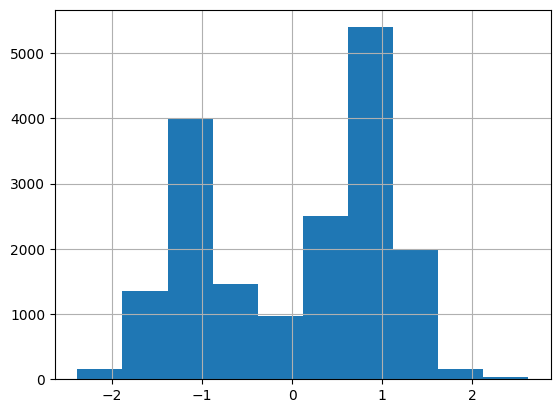

In [19]:
pd.DataFrame(X_train)[0].hist()

<Axes: >

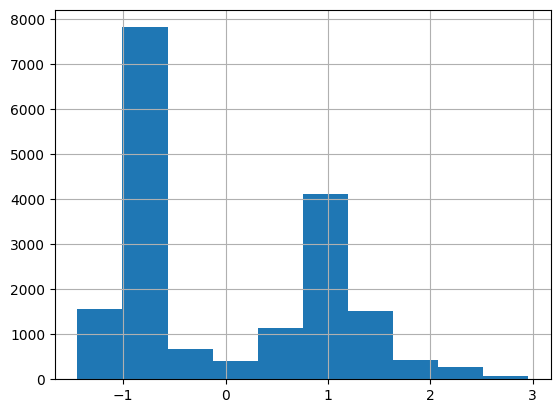

In [20]:
pd.DataFrame(X_train)[1].hist()

In [21]:
# we use regressor than classfiyer as we want continious values,
#if answer is a category (yes/no, red/blue, spam/ham) → Classifier (sort in bucket).answer is a number (price, age, weight) → Regressor(predicting numbers)

#sum((y_hat(x)-y)^2)/n: mean squared error, bigger the value bad it is
from sklearn.metrics import mean_squared_error as mse # mean squared error
from sklearn.linear_model import LinearRegression
import numpy as np

lm = LinearRegression().fit(X_train, y_train)
#mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False) # this model does not support this statement so the below
np.sqrt(mse(lm.predict(X_train), y_train)), np.sqrt(mse(lm.predict(X_val), y_val))# mse higher is bad, only compare numbers
#if y_val value is much greater than y_train the model is over fitting the values here

(np.float64(68593.05578127236), np.float64(71382.43558330165))

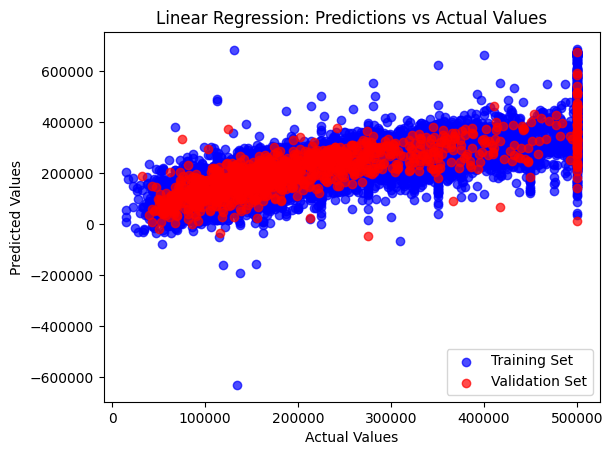

In [22]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = lm.predict(X_train)

# Predictions on Validation Set
val_predictions = lm.predict(X_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predictions vs Actual Values')
plt.legend()
plt.show()


In [23]:
#k nearest neighbors knn
from sklearn.neighbors import KNeighborsRegressor#knn:tell me who your friends are (2 gamers, 1 bookworm), and I’ll tell you who you are(gamer), works well with small data

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)#when we are taking k(n_neighors here) to 1, its looking at only his value so train set will give error 0, we change k to 3 to fit the data and check val is closer to training value
#mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)# model does not accpet this
np.sqrt(mse(knn.predict(X_train), y_train)), np.sqrt(mse(knn.predict(X_val), y_val))#we care about val(validation value)than train, val value should be closer to train value, otherwiuse the model is over or under fitting

(np.float64(53759.09908812057), np.float64(62161.22860469906))

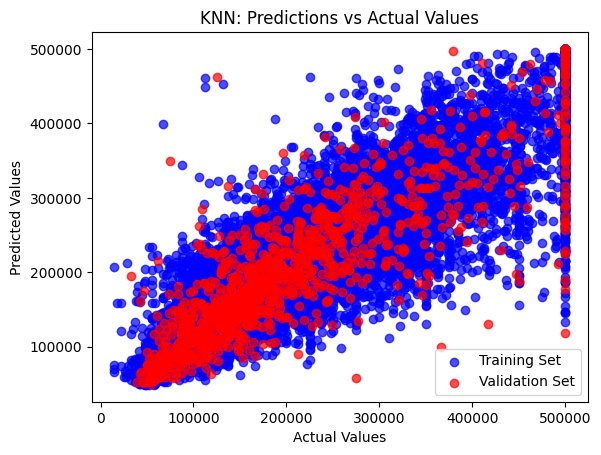

In [24]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = knn.predict(X_train)

# Predictions on Validation Set
val_predictions = knn.predict(X_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN: Predictions vs Actual Values')
plt.legend()
plt.show()


In [25]:
from sklearn.ensemble import RandomForestRegressor#makes multiple desion tree and votes for best results, good for big data set

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)#Depth is the number of questions in a chain
#mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)
np.sqrt(mse(rfr.predict(X_train), y_train)), np.sqrt(mse(rfr.predict(X_val), y_val))

(np.float64(43527.501563882775), np.float64(53334.124351075574))

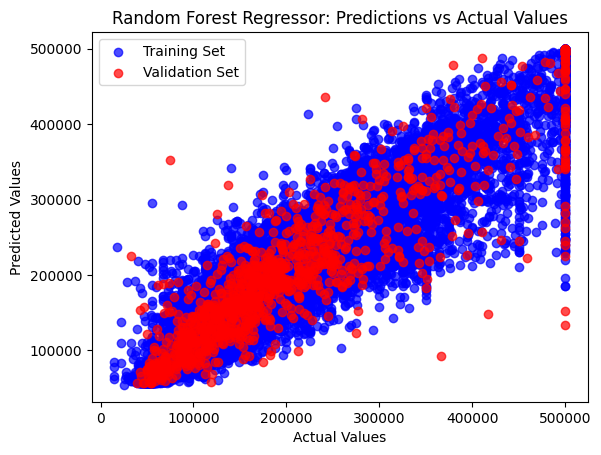

In [26]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = rfr.predict(X_train)

# Predictions on Validation Set
val_predictions = rfr.predict(X_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Predictions vs Actual Values')
plt.legend()
plt.show()

In [27]:
from sklearn.ensemble import GradientBoostingRegressor#A group of small trees 🌳🌳🌳 built one after another, where each new tree learns from the mistakes of the previous ones → together they make powerful predictions.
#more accuate than random forest

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
#mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)
np.sqrt(mse(gbr.predict(X_train), y_train)), np.sqrt(mse(gbr.predict(X_val), y_val))

(np.float64(47274.82259072158), np.float64(51353.501285098435))

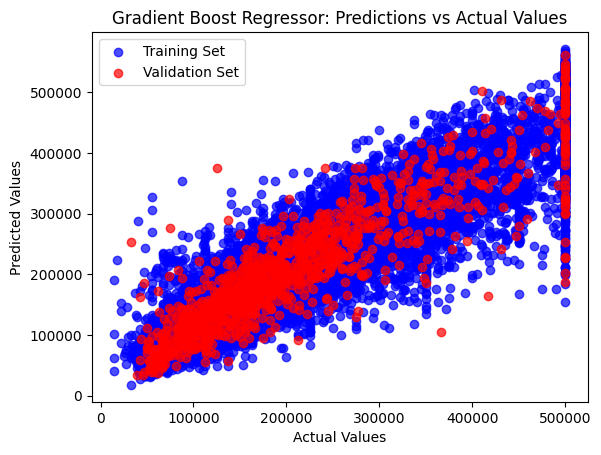

In [28]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = gbr.predict(X_train)

# Predictions on Validation Set
val_predictions = gbr.predict(X_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost Regressor: Predictions vs Actual Values')
plt.legend()
plt.show()

In [ ]:
# #Neutral network
from tensorflow.keras.models import Sequential #sequential in order layers in neural network,TensorFlow: a library to teach computers how to learn from data.
from tensorflow.keras.layers import * #Data (tensors) flows through operations to get predictions
from tensorflow.keras.callbacks import ModelCheckpoint#modelcheckpoint goes through training set, makes update called eprox and saves in model checkpoint the best one with low validation value
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np

# Convert boolean columns to integers
X_train = np.asarray(X_train).astype("float32")
X_val   = np.asarray(X_val).astype("float32")
y_train = np.asarray(y_train).astype("float32").reshape(-1, 1)
y_val   = np.asarray(y_val).astype("float32").reshape(-1, 1)


simple_nn = Sequential() #simple neural network
simple_nn.add(InputLayer((13,))) #all the coloumn above thats 0 to 12 so 13
simple_nn.add(Dense(2, 'relu'))#relu: pass positive values, block negative ones.
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)
## OR the one below code will work for neural network

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 51404271616.0000 - root_mean_squared_error: 226725.0938 - val_loss: 42865934336.0000 - val_root_mean_squared_error: 207040.9062
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 33072046080.0000 - root_mean_squared_error: 181857.2188 - val_loss: 22398519296.0000 - val_root_mean_squared_error: 149661.3438
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14063223808.0000 - root_mean_squared_error: 118588.4609 - val_loss: 7891792384.0000 - val_root_mean_squared_error: 88835.7578
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6195321856.0000 - root_mean_squared_error: 78710.3672 - val_loss: 5486789632.0000 - val_root_mean_squared_error: 74072.8672
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5098955776.0000 - root_mean_squared_error: 71406.9766 - val_loss: 5232400384.0000 - val_root_mean_squared_error: 72335.3359
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4875

In [ ]:
# When above one does not work: use this code Neural Network
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential#sequential in order layers in neural network,TensorFlow: a library to teach computers how to learn from data.
# from tensorflow.keras.layers import Input, Dense#Data (tensors) flows through operations to get predictions
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping#modelcheckpoint goes through training set, makes update called eprox and saves in model checkpoint the best one wioth loset validation value
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam

# # --- ensure data is ready ---
# # X_train, X_val, y_train, y_val assumed to exist
# X_train = np.asarray(X_train).astype("float32")
# X_val   = np.asarray(X_val).astype("float32")
# y_train = np.asarray(y_train).astype("float32").reshape(-1, 1)
# y_val   = np.asarray(y_val).astype("float32").reshape(-1, 1)

# # ---Simple neural network model ---
# model = Sequential([
#     Input(shape=(X_train.shape[1],)), # auto-matches your feature count
#     Dense(2, activation="relu"),
#     Dense(1, activation="linear") # default is linear, but explicit is fine
# ])

# opt = Adam(learning_rate=0.1) #if we kep learning rate to 10 it will not actually save best value in model folder,even 0.1 learning rate is high ideally: 1e-3

# os.makedirs("models", exist_ok=True)
# cp = ModelCheckpoint(
#     filepath="models/simple_nn.keras",
#     monitor="val_loss",
#     save_best_only=True
# )

# es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# model.compile(optimizer=opt, loss="mse", metrics=[RootMeanSquaredError()])

# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=100,
#     batch_size=32,
#     callbacks=[cp, es],
#     verbose=1
# )


In [31]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn.keras')
#mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)
np.sqrt(mse(simple_nn.predict(X_train), y_train)), np.sqrt(mse(simple_nn.predict(X_val), y_val))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(np.float64(66235.65203121353), np.float64(69002.4370584112))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


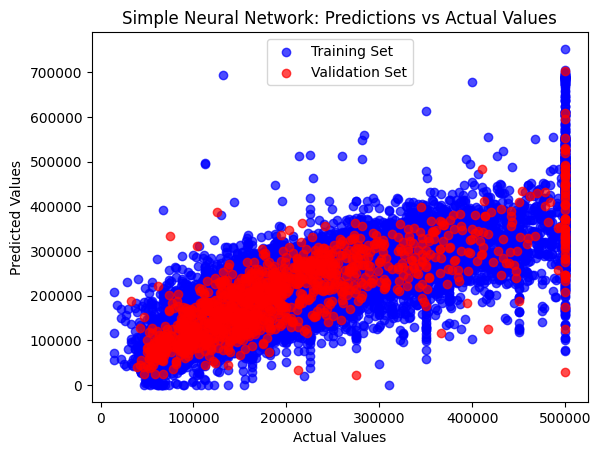

In [32]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = simple_nn.predict(X_train)

# Predictions on Validation Set
val_predictions = simple_nn.predict(X_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Simple Neural Network: Predictions vs Actual Values')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np

medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

# Convert boolean columns to integers
X_train_numeric = X_train.astype(np.float32)
X_val_numeric = X_val.astype(np.float32)

print("X_train_numeric dtypes:", X_train_numeric.dtype) # Add dtype check

medium_nn.fit(x=X_train_numeric, y=y_train, validation_data=(X_val_numeric, y_val), callbacks=[cp], epochs=100)

X_train_numeric dtypes: float32
Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8445684224.0000 - root_mean_squared_error: 91900.4062 - val_loss: 5128786944.0000 - val_root_mean_squared_error: 71615.5469
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4439715840.0000 - root_mean_squared_error: 66631.1953 - val_loss: 4983784960.0000 - val_root_mean_squared_error: 70595.9297
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4342843392.0000 - root_mean_squared_error: 65900.2500 - val_loss: 4550269952.0000 - val_root_mean_squared_error: 67455.6875
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4248740352.0000 - root_mean_squared_error: 65182.3633 - val_loss: 4658385408.0000 - val_root_mean_squared_error: 68252.3672
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4222726400.0000 - root_mean_squared_error: 64982.5078 - val_loss: 4825896960.0000 - val_root_mean_squared_error: 69468.6797
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s

In [34]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import mean_squared_error as mse

medium_nn = load_model('models/medium_nn.keras')

# Convert boolean columns to integers for prediction
X_train_numeric = X_train.astype(np.float32)
X_val_numeric = X_val.astype(np.float32)

#flatten():reshapes input (e.g., images) into a vector before feeding to Dense layers.
#You have a table with rows and columns, and flatten() just lays everything out in a single row.

np.sqrt(mse(medium_nn.predict(X_train_numeric).flatten(), y_train)), np.sqrt(mse(medium_nn.predict(X_val_numeric).flatten(), y_val))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(np.float64(52713.922563209046), np.float64(55326.17695087923))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


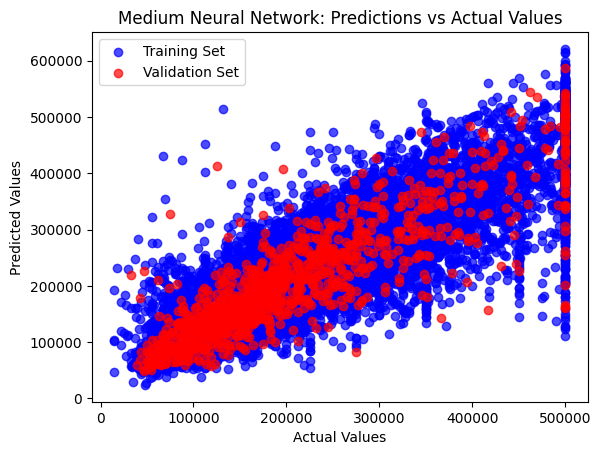

In [35]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = medium_nn.predict(X_train)

# Predictions on Validation Set
val_predictions = medium_nn.predict(X_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Medium Neural Network: Predictions vs Actual Values')
plt.legend()
plt.show()

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np

large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

# Convert boolean columns to integers
X_train_numeric = X_train.astype(np.float32)
X_val_numeric = X_val.astype(np.float32)

print("X_train_numeric dtypes:", X_train_numeric.dtype) # Add dtype check

large_nn.fit(x=X_train_numeric, y=y_train, validation_data=(X_val_numeric, y_val), callbacks=[cp], epochs=100)

X_train_numeric dtypes: float32
Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6157453824.0000 - root_mean_squared_error: 78469.4453 - val_loss: 4390590464.0000 - val_root_mean_squared_error: 66261.5312
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4422192640.0000 - root_mean_squared_error: 66499.5703 - val_loss: 4441085440.0000 - val_root_mean_squared_error: 66641.4688
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4064917248.0000 - root_mean_squared_error: 63756.7031 - val_loss: 4419298304.0000 - val_root_mean_squared_error: 66477.8047
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4012491264.0000 - root_mean_squared_error: 63344.2266 - val_loss: 4067054848.0000 - val_root_mean_squared_error: 63773.4648
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3807786240.0000 - root_mean_squared_error: 61707.2617 - val_loss: 4073127168.0000 - val_root_mean_squared_error: 63821.0547
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import mean_squared_error as mse

large_nn = load_model('models/large_nn.keras')

# Convert boolean columns to integers for prediction
X_train_numeric = X_train.astype(np.float32)
X_val_numeric = X_val.astype(np.float32)

np.sqrt(mse(large_nn.predict(X_train_numeric).flatten(), y_train)), np.sqrt(mse(large_nn.predict(X_val_numeric).flatten(), y_val))# val value is greater than train so overfitting problem

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(np.float64(46870.60656744267), np.float64(53718.3958062785))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


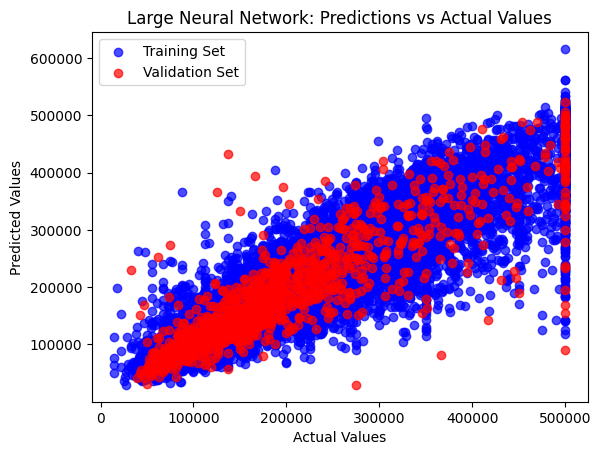

In [37]:
import matplotlib.pyplot as plt

# Predictions on Training Set
train_predictions = large_nn.predict(X_train)

# Predictions on Validation Set
val_predictions = large_nn.predict(X_val)

# Scatter plot for both Training and Validation Sets
plt.scatter(y_train, train_predictions, color='blue', label='Training Set', alpha=0.7)
plt.scatter(y_val, val_predictions, color='red', label='Validation Set', alpha=0.7)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Large Neural Network: Predictions vs Actual Values')
plt.legend()
plt.show()

In [39]:

#mse(gbr.predict(X_test), y_test, squared=False)
np.sqrt(mse(gbr.predict(X_test), y_test))

np.float64(49378.82695913562)